# Pendahuluan
Sejak tahun 2008, para pengunjung Kota New York dan masyarakat setempat telah menggunakan Airbnb untuk memperluas kemungkinan perjalanan dan menghadirkan cara yang lebih unik dan personal untuk mengalami dunia. Dataset ini menjelaskan aktivitas listing dan metrik di NYC, NY untuk 2019. Data ini mencakup semua informasi yang diperlukan untuk mencari tahu lebih lanjut tentang host, ketersediaan geografis, metrik yang diperlukan untuk membuat prediksi dan menarik kesimpulan.

In [1]:
# Importing Some Python Modules
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
import warnings; warnings.simplefilter('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

%matplotlib inline
plt.style.use('bmh'); sns.set()

In [2]:
# Importing CSV data 
data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
data.head(7)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0


In [4]:
# Tipe Datanya : DataFrame (df)
type(data)

# Ukuran Data
N, P = data.shape
print('baris = ', N, ', Kolom = ', P)

data.info()

baris =  48895 , Kolom =  16
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365         

# Feature Selection

In [5]:
# Drop kolom pertama karena tidak berguna (hanya index)
data.drop(["id", "host_id", "latitude", "longitude"], axis=1, inplace=True)
data.dtypes

name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Preprocessing

In [6]:
# Statistika Sederhana dari data "Numerik"-nya
data.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
# Memilih hanya variable dengan tipe tertentu
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.head()
# Perhatikan price_num adalah variable df baru! ... (hati-hati di data yang besar)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,NaN,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [9]:
# Memilih hanya variable dengan tipe tertentu
data_obj = data.select_dtypes(include = ['object'])
data_obj.head(10)

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19
5,Large Cozy 1 BR Apartment In Midtown East,Chris,Manhattan,Murray Hill,Entire home/apt,2019-06-22
6,BlissArtsSpace!,Garon,Brooklyn,Bedford-Stuyvesant,Private room,2017-10-05
7,Large Furnished Room Near B'way,Shunichi,Manhattan,Hell's Kitchen,Private room,2019-06-24
8,Cozy Clean Guest Room - Family Apt,MaryEllen,Manhattan,Upper West Side,Private room,2017-07-21
9,Cute & Cozy Lower East Side 1 bdrm,Ben,Manhattan,Chinatown,Entire home/apt,2019-06-09


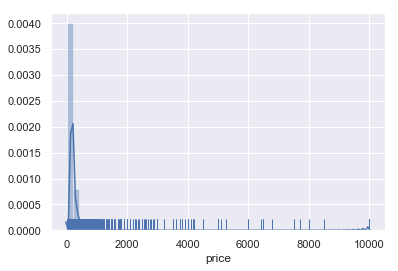

In [17]:
# Distributions
p = sns.distplot(data['price'], kde=True, rug=True)

In [18]:
data2 = data[np.abs(data["price"] - data["price"].mean())<=(3*data["price"].std())] # Data tanpa outliers
print(data2.shape, data.shape)

(48507, 12) (48895, 12)


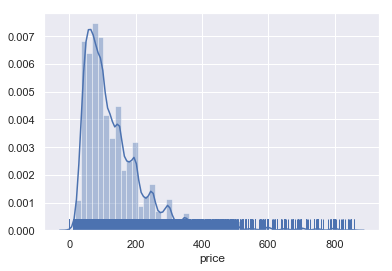

In [20]:
# Distributions Price2
p = sns.distplot(data2['price'], kde=True, rug=True)

# Visualisasi

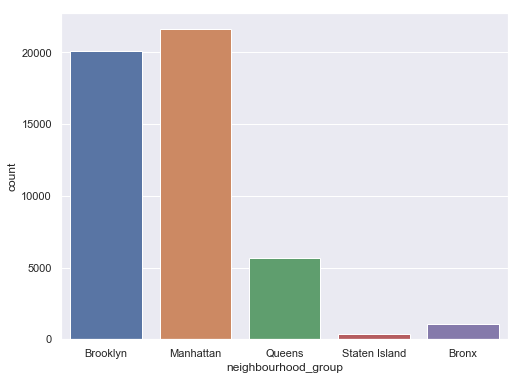

In [14]:
plt.figure(figsize=(8,6))
p = sns.countplot(x="neighbourhood_group", data=data)

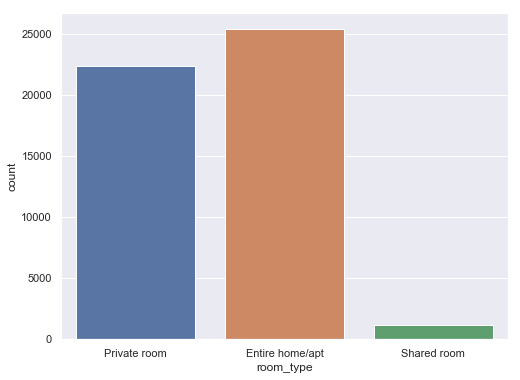

In [11]:
plt.figure(figsize=(8,6)) # https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
p = sns.countplot(x="room_type", data=data)

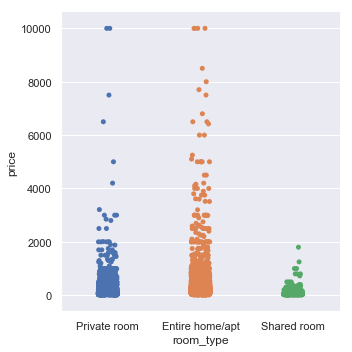

In [13]:
#Scatter Plot
p= sns.catplot(x="room_type", y="price", data=data)

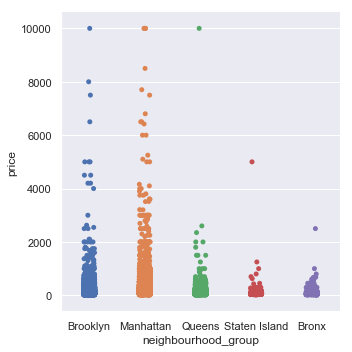

In [16]:
#Scatter Plot
p= sns.catplot(x="neighbourhood_group", y="price", data=data)

# Kesimpulan
Rata-rata harga penginapan sebesar 152.720687 USD dengan minimum bermalam rata-rata 7 hari. Paling sering penginapan yang dikunjungi adalah kota Manhattan dan yang jarang dikunjungi adalah kota Staten Island. Dan tipe ruangan yang paling banyak diminati adalah Entire home/apartement sedangkan yang paling sedikit diminati adalah shareed room.